In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

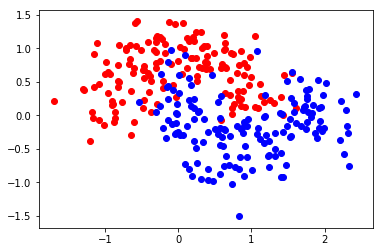

In [26]:
x,y = datasets.make_moons(n_samples=300,noise=0.3,random_state=666)
plt.scatter(x[y==0,0],x[y==0,1],color = "red")
plt.scatter(x[y==1,0],x[y==1,1],color = "blue")

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [28]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(X_train,y_train)
logis.score(X_test,y_test)

d:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8666666666666667

In [29]:
from sklearn.svm import SVC
svr = SVC()
svr.fit(X_train,y_train)
svr.score(X_test,y_test)

d:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8777777777777778

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8444444444444444

In [31]:
y1_predict = logis.predict(X_test)
y2_predict = svr.predict(X_test)
y3_predict = dt.predict(X_test)
y_predict = np.array((y1_predict+y2_predict+y3_predict)>=2)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8777777777777778

In [36]:
from sklearn.ensemble import VotingClassifier
vr = VotingClassifier(estimators=[
    ("logis",LogisticRegression()),
    ("svr",SVC(probability=True)),
    ("tree",DecisionTreeClassifier(random_state=666))
],voting="soft")
vr.fit(X_train,y_train)
vr.score(X_test,y_test)


d:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8888888888888888

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
bc = BaggingClassifier(DecisionTreeClassifier(),
                       # 使用的演算法个数,每次看的数据量
                       n_estimators=800,max_samples=100,bootstrap=True)

In [51]:
bc.fit(X_train,y_train)
bc.score(X_test,y_test)

0.9333333333333333

In [59]:
%%time
bc2 = BaggingClassifier(DecisionTreeClassifier(),
                       # 使用的演算法个数,每次看的数据量
                       n_estimators=8000,max_samples=100,bootstrap=True,oob_score=True)

Wall time: 997 µs


In [60]:
%%time
bc2.fit(x,y)
bc2.oob_score_


Wall time: 4.76 s


0.9033333333333333

In [64]:
bc3 = BaggingClassifier(DecisionTreeClassifier(),
                       # 使用的演算法个数,每次看的数据量
                       n_estimators=8000,max_samples=100,bootstrap=True,oob_score=True,n_jobs=6)

In [65]:
%%time
bc3.fit(x,y)
bc3.oob_score_


Wall time: 2.56 s


0.9066666666666666

In [70]:
bc4 = BaggingClassifier(DecisionTreeClassifier(),
                       # 使用的演算法个数,每次看的数据量
                       n_estimators=8000,max_samples=300,bootstrap=True,oob_score=True,n_jobs=6,
                        max_features=1,bootstrap_features=True)

In [71]:
bc4.fit(x,y)
bc4.oob_score_


0.8033333333333333

In [72]:
bc4 = BaggingClassifier(DecisionTreeClassifier(),
                       # 使用的演算法个数,每次看的数据量
                       n_estimators=8000,max_samples=100,bootstrap=True,oob_score=True,n_jobs=6,
                        max_features=1,bootstrap_features=True)



In [73]:
bc4.fit(x,y)
bc4.oob_score_

0.8633333333333333

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=8000,max_leaf_nodes=30,oob_score=True,bootstrap=True)
etc.fit(x,y)
etc.oob_score_

0.9

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier(n_estimators=8000,oob_score=True,bootstrap=True,n_jobs=-1)
rfc.fit(x,y)
etc.oob_score_

0.9